In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, accuracy_score, confusion_matrix

In [3]:
df = pd.read_csv("Entities.csv")

print("Shape:", df.shape)
print("\nColumns:", df.columns.tolist())

print("\nFirst 5 rows:")
print(df.head())

print("\nDataFrame info:")
print(df.info())

print("\nMissing values per column:")
print(df.isna().sum())

Shape: (168446, 18)

Columns: ['Unnamed: 0', 'property_id', 'location_id', 'page_url', 'property_type', 'price', 'location', 'city', 'province_name', 'latitude', 'longitude', 'baths', 'purpose', 'bedrooms', 'date_added', 'agency', 'agent', 'Total_Area']

First 5 rows:
   Unnamed: 0  property_id  location_id  \
0           0       237062         3325   
1           1       346905         3236   
2           2       386513          764   
3           3       656161          340   
4           4       841645         3226   

                                            page_url property_type     price  \
0  https://www.zameen.com/Property/g_10_g_10_2_gr...          Flat  10000000   
1  https://www.zameen.com/Property/e_11_2_service...          Flat   6900000   
2  https://www.zameen.com/Property/islamabad_g_15...         House  16500000   
3  https://www.zameen.com/Property/islamabad_bani...         House  43500000   
4  https://www.zameen.com/Property/dha_valley_dha...         House   700

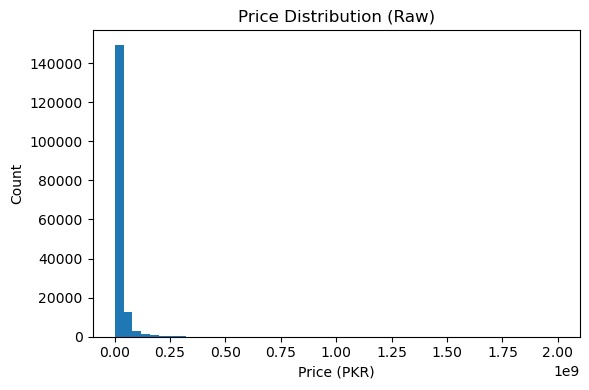

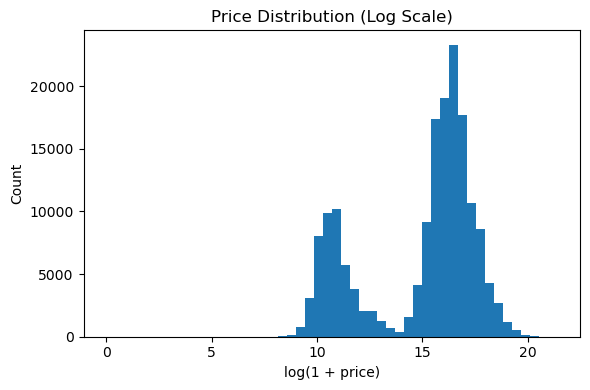

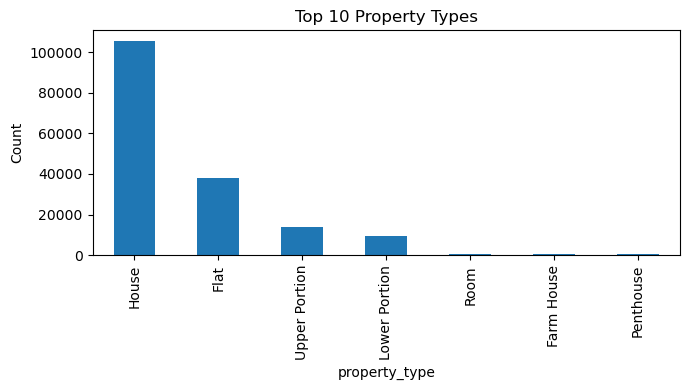

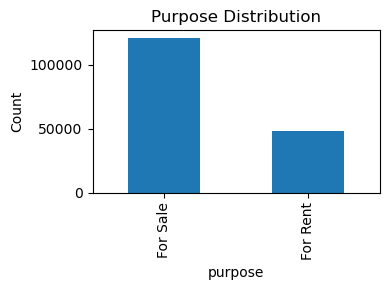

In [4]:
# Price distribution (raw)
plt.figure(figsize=(6, 4))
plt.hist(df["price"].dropna(), bins=50)
plt.xlabel("Price (PKR)")
plt.ylabel("Count")
plt.title("Price Distribution (Raw)")
plt.tight_layout()
plt.show()

# Price distribution with log scale
df["log_price"] = np.log1p(df["price"])
plt.figure(figsize=(6, 4))
plt.hist(df["log_price"].dropna(), bins=50)
plt.xlabel("log(1 + price)")
plt.ylabel("Count")
plt.title("Price Distribution (Log Scale)")
plt.tight_layout()
plt.show()

# Property type counts
plt.figure(figsize=(7, 4))
df["property_type"].value_counts().head(10).plot(kind="bar")
plt.ylabel("Count")
plt.title("Top 10 Property Types")
plt.tight_layout()
plt.show()

# Purpose counts (For Sale vs For Rent)
plt.figure(figsize=(4, 3))
df["purpose"].value_counts().plot(kind="bar")
plt.ylabel("Count")
plt.title("Purpose Distribution")
plt.tight_layout()
plt.show()

In [5]:
# Select relevant columns
cols_reg = ["price", "bedrooms", "baths", "Total_Area",
            "city", "property_type"]
df_reg = df[cols_reg].copy()

# Drop rows with missing values
df_reg = df_reg.dropna()

# Remove rows where Total_Area is zero or negative
df_reg = df_reg[df_reg["Total_Area"] > 0]

# Optional: feature - price per unit area
df_reg["price_per_area"] = df_reg["price"] / df_reg["Total_Area"]

print("Shape of df_reg:", df_reg.shape)
print(df_reg.head())

Shape of df_reg: (168434, 7)
      price  bedrooms  baths  Total_Area       city property_type  \
0  10000000         2      2    1089.004  Islamabad          Flat   
1   6900000         3      3   15246.056  Islamabad          Flat   
2  16500000         5      6    2178.008  Islamabad         House   
3  43500000         4      4   10890.000  Islamabad         House   
4   7000000         3      3    2178.008  Islamabad         House   

   price_per_area  
0     9182.702727  
1      452.576063  
2     7575.729749  
3     3994.490358  
4     3213.945954  


In [6]:
# Select relevant columns
cols_reg = ["price", "bedrooms", "baths", "Total_Area",
            "city", "property_type"]
df_reg = df[cols_reg].copy()

# Drop rows with missing values
df_reg = df_reg.dropna()

# Remove rows where Total_Area is zero or negative
df_reg = df_reg[df_reg["Total_Area"] > 0]

# Optional: feature - price per unit area
df_reg["price_per_area"] = df_reg["price"] / df_reg["Total_Area"]

print("Shape of df_reg:", df_reg.shape)
print(df_reg.head())

Shape of df_reg: (168434, 7)
      price  bedrooms  baths  Total_Area       city property_type  \
0  10000000         2      2    1089.004  Islamabad          Flat   
1   6900000         3      3   15246.056  Islamabad          Flat   
2  16500000         5      6    2178.008  Islamabad         House   
3  43500000         4      4   10890.000  Islamabad         House   
4   7000000         3      3    2178.008  Islamabad         House   

   price_per_area  
0     9182.702727  
1      452.576063  
2     7575.729749  
3     3994.490358  
4     3213.945954  


In [8]:
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

reg_model = LinearRegression()
reg_model.fit(X_train_reg, y_train_reg)

NameError: name 'X_reg' is not defined

In [9]:
y_pred_reg = reg_model.predict(X_test_reg)

r2 = r2_score(y_test_reg, y_pred_reg)
print("R² score:", r2)

# Optional: simple scatter of actual vs predicted
plt.figure(figsize=(6, 6))
plt.scatter(y_test_reg, y_pred_reg, alpha=0.3)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price")
plt.grid(True, alpha=0.2)
plt.tight_layout()
plt.show(

_IncompleteInputError: incomplete input (140613518.py, line 14)

In [10]:
# Columns for classification
cols_clf = ["purpose", "bedrooms", "baths", "Total_Area", "price"]
df_clf = df[cols_clf].copy()

# Drop missing values
df_clf = df_clf.dropna()

# Encode purpose (For Sale / For Rent) as 0/1
le = LabelEncoder()
df_clf["purpose_label"] = le.fit_transform(df_clf["purpose"])

print(df_clf["purpose"].value_counts())
print(df_clf.head())

purpose
For Sale    120655
For Rent     47791
Name: count, dtype: int64
    purpose  bedrooms  baths  Total_Area     price  purpose_label
0  For Sale         2      2    1089.004  10000000              1
1  For Sale         3      3   15246.056   6900000              1
2  For Sale         5      6    2178.008  16500000              1
3  For Sale         4      4   10890.000  43500000              1
4  For Sale         3      3    2178.008   7000000              1


In [11]:
# Features and target
feature_cols = ["bedrooms", "baths", "Total_Area", "price"]
X_clf = df_clf[feature_cols]
y_clf = df_clf["purpose_label"]

X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X_clf, y_clf, test_size=0.2, random_state=42
)

clf_model = RandomForestClassifier(n_estimators=100, random_state=42)
clf_model.fit(X_train_clf, y_train_clf)

RandomForestClassifier(random_state=42)

In [12]:
y_pred_clf = clf_model.predict(X_test_clf)

acc = accuracy_score(y_test_clf, y_pred_clf)
cm = confusion_matrix(y_test_clf, y_pred_clf)

print("Accuracy:", acc)
print("Confusion Matrix:")
print(cm)

Accuracy: 0.9992282576432175
Confusion Matrix:
[[ 9518     3]
 [   23 24146]]
